**plot timeseries of Surface Temperature**

In [1]:
import sys
print(sys.version)
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
import numpy as np
import xarray as xr
xr.set_options(keep_attrs=True)
import cartopy.crs as ccrs

# load some useful functions written or acquired by phil rasch
%run -i ./pjrlib

3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:57:19) [GCC 11.3.0]


In [2]:
# open a file that will hold all the filenames used by the program
flname = '/tmp/flname'
file = open(flname, 'w')
file.write('list of files used by gavg_xxx\n')
file.close()
file = open(flname, 'a')

In [3]:
fnprefix='GAVG_tsers_E3SM_and_CESM'

In [4]:
def make_GA_tser(Varname, filespec, dirname, casename, extname):
    ''' make global avg from tseries files
        Varname: Variable name
        filespec: the string used to format the filename for a model
        dirname: directory where netcdf file is found
        casename: name of case
        extname: string used to specify years, etc
        returns DataArray with timeseries of global averages
    '''
    ind1 = filespec.format(dir=dirname,case=casename,ext=extname,var=Varname)
    print('opening',ind1)
    file.write(ind1+'\n')
    DS1 = xr.open_mfdataset(ind1)
    DS1 = center_time(DS1)
    month_length = DS1.time.dt.days_in_month
    twgts = month_length.groupby("time.year") / month_length.groupby("time.year").sum()
    #print('twgts',twgts)
    #print('xxx',DS1.time)
    Var1 = xr_getvar(Varname,DS1)


    if 'area' in DS1:
        area = DS1['area']
        print('area on DS1')
    else: 
        if 'ncol' in DS1.dims:
            print ('get CS data')
            areafile = '~/NetCDF_Files/F2010_PJR1.eam.h0.0001-01.nc'
            DSA = xr.open_mfdataset(areafile)
            if len(DSA['ncol']) != len(DS1['ncol']):
                raise ValueError('area file mismatch')
            area = DSA.area
        else:
            print('calculating fv area weights')
            lat = Var1['lat'].values
            lon = Var1['lon'].values
            aread = make_fvarea(lon,lat)
            area = xr.DataArray(aread, dims=['lat','lon'], coords={'lon':lon,'lat':lat})
            area.attrs['units']='steradians'
        #print('area',area)
        
    wdims = area.dims
    #print('wdims',wdims)
    weights = area/(area.sum(dim=wdims))
    #print('weights sum',weights.shape,weights.sum(dim=wdims).values)

    #print(Varname, Var1)
    # Global Avg by month
    V1A = Var1.weighted(weights).mean(dim=wdims)
    # calculate ann avgs accounting for number of days in month
    V1AY = (V1A*month_length).groupby("time.year").sum()/month_length.groupby("time.year").sum()
    #print('V1AY.values', V1AY.values)
    return V1AY

regtag = ""
weights = None




/e3sm_prod/phil/timeseries/e3sm-reshaped/20221128.v2.LR.WCYCLSSP245.E2_CNTL_01.R1-3_CDNC2000/20221128.v2.LR.WCYCLSSP245.E2_CNTL_01.R1-3_CDNC2000.eam.h0.2015-2065.FSNT.nc
/e3sm_prod/phil/timeseries/cesm2-mcb-reshaped/b.e21.BSSP245smbb_MCBss7TgYr_R1R2R3.f09_g17.LE2-1011.001/b.e21.BSSP245smbb_MCBss7TgYr_R1R2R3.f09_g17.LE2-1011.001.cam.h0.2015-2065.TS.nc

-------------------------------TS
opening /e3sm_prod/phil/timeseries/cesm2-mcb-reshaped/b.e21.BSSP245smbb_MCBss7TgYr_R1R2R3.f09_g17.LE2-1011.001/b.e21.BSSP245smbb_MCBss7TgYr_R1R2R3.f09_g17.LE2-1011.001.cam.h0.2015-2065.TS.nc
calculating fv area weights
opening /e3sm_prod/phil/timeseries/e3sm-reshaped/20221128.v2.LR.WCYCLSSP245.E2_CNTL_01.R1-3_CDNC2000/20221128.v2.LR.WCYCLSSP245.E2_CNTL_01.R1-3_CDNC2000.eam.h0.2015-2065.TS.nc
area on DS1
time [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]
opening /e3sm_prod/phil/timeseries/e3sm-res

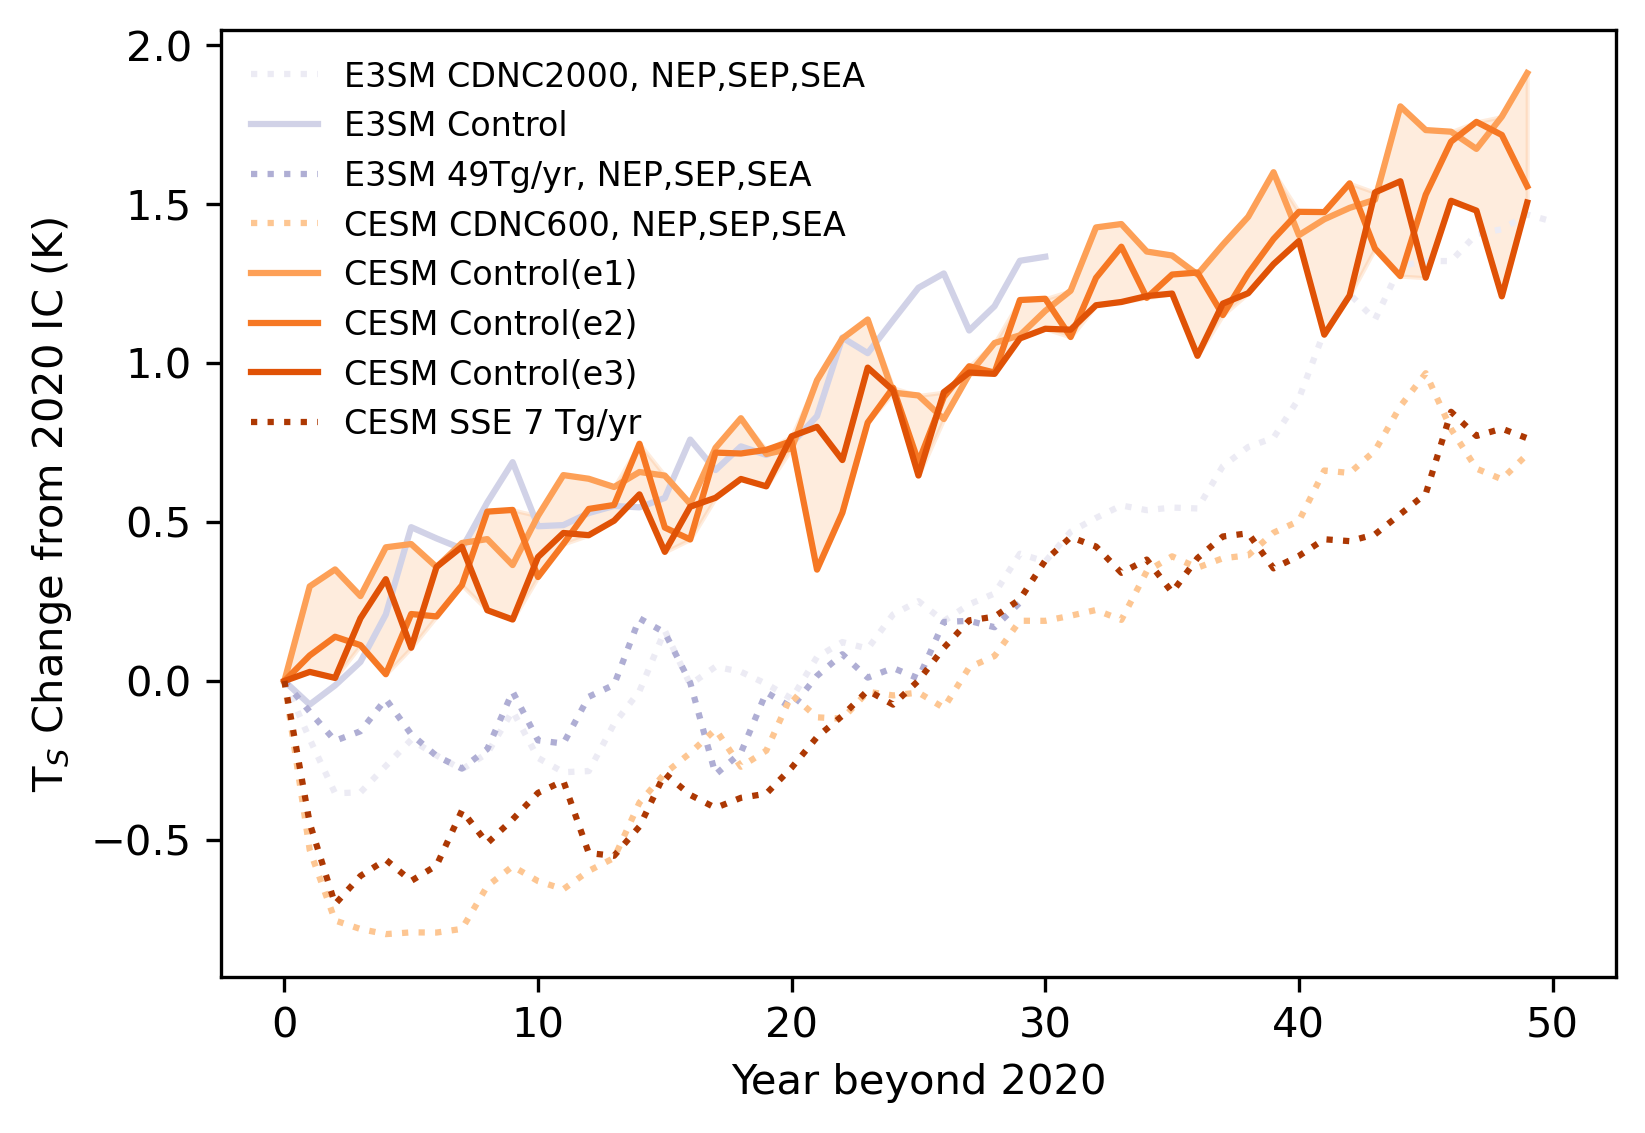

field processing complete


In [5]:

if True:
    dir1 = "/e3sm_prod/phil/timeseries/cesm2-mcb-reshaped/MCB_R1R2R3_CN600cm_NEP"
    case1 = "MCB_R1R2R3_CN600cm_NEP"
    ext1 = ".cam.h0.1-10"

    dir1 = "/e3sm_prod/phil/timeseries/e3sm-reshaped/20221128.v2.LR.WCYCLSSP245.E2_CNTL_01.R1-3_CDNC2000"
    case1 = "20221128.v2.LR.WCYCLSSP245.E2_CNTL_01.R1-3_CDNC2000"
    ext1 = ".eam.h0.2015-2065"
    tit1 = "E3SM CDNC2000, NEP,SEP,SEA"

string1 = "{dir:s}/{case:s}{ext:s}.{var:s}.nc"
print(string1.format(dir=dir1,case=case1,ext=ext1,var="FSNT"))



dir2 = "/e3sm_prod/phil/timeseries/e3sm-reshaped/20221018.v2.LR.WCYCLSSP245.E2_CNTL_02_ALLMCB_2020-2041"
case2 = "20221018.v2.LR.WCYCLSSP245.E2_CNTL_02"
ext2 = ".eam.h0.2020-2041"

dir2 = "/e3sm_prod/phil/timeseries/e3sm-reshaped/20221014.v2.LR.WCYCLSSP245.E2_CNTL_01"
case2 = "20221014.v2.LR.WCYCLSSP245.E2_CNTL_01"
ext2 = ".eam.h0.2046-2064"
ext2 = ".eam.h0.2015-2046"
tit2 = "E3SM Control"

string2 = "{dir:s}/{case:s}{ext:s}.{var:s}.nc"

dir3 = "/e3sm_prod/phil/timeseries/e3sm-reshaped/20230724.v2.LR.WCYCLSSP245.MCB-SSLT-EM.R1-3.test01"
case3 = ""
ext3 = "_201501_204412.nc"
tit3 = "E3SM 49Tg/yr, NEP,SEP,SEA"
string3 = "{dir:s}/{var:s}{ext:s}"



case4 = "b.e21.BSSP245smbb_MCB600cm_R1R2R3.f09_g17.LE2-1011.001"
dir4 = "/e3sm_prod/phil/timeseries/cesm2-mcb-reshaped/"+case4+"/"
ext4 = ".cam.h0.2015-2064." 
tit4 = "CESM CDNC600, NEP,SEP,SEA"
string4 = "{dir:s}/{case:s}{ext:s}{var:s}.nc"
ind = string4.format(dir=dir4,case=case4,ext=ext4,var="TS")
#print('ind is ',ind)
file.write(ind+'\n')
DS = xr.open_mfdataset(ind)
#print(DS)
#1./0.
dir5 = "/e3sm_prod/phil/timeseries/cesm2-mcb-reshaped/CESM2_SSP245/ens001"
case5 = "b.e21.BSSP245smbb.f09_g17.001"
ext5 = ".cam.h0"
ext5f = ".201501-206412.nc"
tit5 = "CESM Control(e1)"
string5 = "{dir:s}/{case:s}{ext:s}.{var:s}"+ext5f

dir6 = "/e3sm_prod/phil/timeseries/cesm2-mcb-reshaped/CESM2_SSP245/ens002"
case6 = "b.e21.BSSP245smbb.f09_g17.002"
ext6 = ".cam.h0"
ext6f = ".201501-206412.nc"
tit6 = "CESM Control(e2)"
string6 = "{dir:s}/{case:s}{ext:s}.{var:s}"+ext6f

dir7 = "/e3sm_prod/phil/timeseries/cesm2-mcb-reshaped/CESM2_SSP245/ens003"
case7 = "b.e21.BSSP245smbb.f09_g17.003"
ext7 = ".cam.h0"
ext7f = ".201501-206412.nc"
tit7 = "CESM Control(e3)"
string7 = "{dir:s}/{case:s}{ext:s}.{var:s}"+ext7f

dir8 = "/e3sm_prod/phil/timeseries/cesm2-mcb-reshaped"
case8 = "b.e21.BSSP245smbb_MCBss7TgYr_R1R2R3.f09_g17.LE2-1011.001"
ext8 = ".cam.h0.2015-2065"
ext8f = ".nc"
tit8 = "CESM SSE 7 Tg/yr"
string8 = "{dir:s}/{case:s}/{case:s}{ext:s}.{var:s}"+ext8f

filespec=string8.format(dir=dir8,case=case8,ext=ext8,var='TS')
print(filespec)
file.write(filespec+'\n')
ind = xr.open_mfdataset(filespec)

Varlist = np.array(['RESTOM','FLNT','FSNT','TS','TMQ','PRECT','AEROD_v','CLDLOW','CLDTOT','LWCF','SWCF','TGCLDIWP','TGCLDLWP',
                    'SHFLX','LHFLX','PBLH','PCONVT','PRECC','PRECS'])
Varlist = np.array(['FLNT'])
Varlist = np.array(['TS'])

for Varname in Varlist:
    print()
    print('-------------------------------'+Varname)
    
    V8AY = make_GA_tser(Varname, string8, dir8, case8, ext8)
    V8AY.coords['year'] = V8AY.coords['year'] - V8AY.coords['year'][0]
    
    V1AY = make_GA_tser(Varname, string1, dir1, case1, ext1)
    #time = V1AY.coords['time']
    V1AY.coords['year'] = V1AY.coords['year'] - V1AY.coords['year'][0]
    V1AY
    print('time',V1AY.coords['year'].values)
    #V1AY.plot()
    
    V2AY = make_GA_tser(Varname, string2, dir2, case2, ext2)
    V2AY.coords['year'] = V2AY.coords['year'] - V2AY.coords['year'][0]
    print('time2',V2AY.coords['year'].values)
    #V2AY.plot()

    if True:
        V3AY = make_GA_tser(Varname, string3, dir3, case3, ext3)
        V3AY.coords['year'] = V3AY.coords['year'] - V3AY.coords['year'][0]
        print('time3',V3AY.coords['year'].values)
        
    V4AY = make_GA_tser(Varname, string4, dir4, case4, ext4)
    #time = V1AY.coords['time']
    V4AY.coords['year'] = V4AY.coords['year'] - V4AY.coords['year'][0]
    #print('time',V4AY.coords['year'].values)

    V5AY = make_GA_tser(Varname, string5, dir5, case5, ext5)
    V5AY.coords['year'] = V5AY.coords['year'] - V5AY.coords['year'][0]
    
    V6AY = make_GA_tser(Varname, string6, dir6, case6, ext6)
    V6AY.coords['year'] = V6AY.coords['year'] - V6AY.coords['year'][0]
    
    V7AY = make_GA_tser(Varname, string7, dir7, case7, ext7)
    V7AY.coords['year'] = V7AY.coords['year'] - V7AY.coords['year'][0]
    

    #V2AY.plot()
    
    fig, axes = plt.subplots(nrows=1,
                             #gridspec_kw={'width_ratios': [1]},
                             #subplot_kw={'projection': plotproj},
                             figsize=(6,4.1),
                            )
    fig.set_dpi(300.0)
    
    # two color tables (one for cesm, one for e3sm. Stay away from the smallest indices for icolors as it will be whitish)
    ecolors = plt.cm.viridis(np.linspace(0, 1, 8))
    ccolors = plt.cm.inferno_r(np.linspace(0, 1, 8))
    ecolors = plt.cm.Purples(np.linspace(0, 1, 8))
    ccolors = plt.cm.Oranges(np.linspace(0, 1, 8))
    
    # pert and control linestyes
    pstyle = 'dotted'
    cstyle = 'solid'
    
    V1AY = V1AY - V1AY[0]
    V2AY = V2AY - V2AY[0]
    V3AY = V3AY - V3AY[0]
    V4AY = V4AY - V4AY[0]
    V5AY = V5AY - V5AY[0]
    V6AY = V6AY - V6AY[0]

    V7AY = V7AY - V7AY[0]
    V8AY = V8AY - V8AY[0]


    #axes.text(0.5,1.01,"ax title")
    V1AY.plot.line(ax=axes,label=tit1,color=ecolors[1,:],linestyle=pstyle)
    V2AY.plot.line(ax=axes,label=tit2,color=ecolors[2,:],linestyle=cstyle)
    V3AY.plot.line(ax=axes,label=tit3,color=ecolors[3,:],linestyle=pstyle)
    V4AY.plot.line(ax=axes,label=tit4,color=ccolors[2,:],linestyle=pstyle)
    V5AY.plot.line(ax=axes,label=tit5,color=ccolors[3,:],linestyle=cstyle)
    V6AY.plot.line(ax=axes,label=tit6,color=ccolors[4,:],linestyle=cstyle)
    V7AY.plot.line(ax=axes,label=tit7,color=ccolors[5,:],linestyle=cstyle)
    V8AY.plot.line(ax=axes,label=tit8,color=ccolors[6,:],linestyle=pstyle)


    Vmin = np.minimum(np.minimum(V5AY,V6AY),V7AY)
    Vmax = np.maximum(np.maximum(V5AY,V6AY),V7AY)
    axes.fill_between(Vmin.year.values, Vmin.values, Vmax.values, color=ccolors[3,:], alpha=0.2)

    if Varname == 'TS':
        axlabel = "T$_S$"
    else:
        axlabel = V1AY.long_name
        
    axes.legend(fontsize=8, framealpha=0.)
    axes.set_xlabel('Year beyond 2020')
    axes.set_ylabel(axlabel+' Change from 2020 IC ('+V1AY.units+')')
    plt.savefig(fnprefix+'_'+Varname+'.pdf',format='pdf',dpi=300)
    plt.show()
    
    print('field processing complete')

In [6]:
file.close()